In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CoPro

In [4]:
eval_valid_path = '../multistage_pipeline/evaluation/valid.csv'
eval_test_path = '../multistage_pipeline/evaluation/test.csv'

In [5]:
eval_valid_df = pd.read_csv(eval_valid_path)
eval_test_df = pd.read_csv(eval_test_path)

In [7]:
eval_test_df

,setting,auroc,acc,acc_pre_latentguard,acc_postlatentguard_delta_0.1,acc_postlatentguard_delta_0.5,acc_postlatentguard_delta_1,acc_postlatentguard_delta_2
0,id_explicit,0.985243,0.868147,0.840308,0.873654,0.888338,0.905409,0.926028
1,id_synonym,0.914174,0.828143,0.816229,0.832645,0.837336,0.843246,0.834334
2,id_adversarial,0.907878,0.828705,0.822514,0.832270,0.837617,0.835460,0.818105
3,ood_explicit,0.944033,0.867596,0.840372,0.866578,0.860625,0.853501,0.826532
4,ood_synonym,0.913460,0.824182,0.800993,0.822243,0.810377,0.793702,0.757794
5,ood_adversarial,0.915109,0.819528,0.799674,0.816194,0.804328,0.786567,0.739026


# Unsafe Diffusion

In [9]:
eval_test_ud_df = pd.read_csv('../multistage_pipeline/evaluation/test_unsafe_diffusion.csv')
eval_test_ud_df 

,auroc,acc,acc_pre_latentguard,acc_postlatentguard_delta_0.1,acc_postlatentguard_delta_0.5,acc_postlatentguard_delta_1,acc_postlatentguard_delta_2,acc_postlatentguard_delta_3,acc_postlatentguard_delta_4,acc_postlatentguard_delta_5
0,0.867304,0.723152,0.716179,0.729428,0.737796,0.751046,0.787308,0.819386,0.811018,0.801953


In [19]:
deltas = list()
acc_list = list()

deltas.append(0)
acc_list.append(eval_test_ud_df.iloc[0]['acc'])

deltas= deltas + [0.1, 0.5, 1, 2, 3, 4, 5]

for delta in [0.1, 0.5, 1, 2, 3, 4, 5]:
    acc_list.append(eval_test_ud_df.iloc[0][f'acc_postlatentguard_delta_{delta}'])



Text(0.5, 1.0, 'Reevaluate using LLM if the latentguard score falls in (threshold-delta, threshold+delta)')

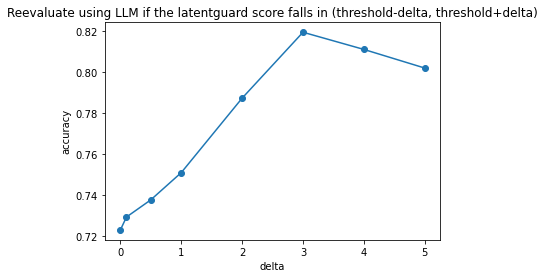

In [21]:
plt.plot(deltas, acc_list, marker='o')
plt.xlabel('delta')
plt.ylabel('accuracy')
plt.title('Reevaluate using LLM if the latentguard score falls in (threshold-delta, threshold+delta)')